## データ分析前準備

In [1]:
%load_ext autoreload
%autoreload 2

# ライブラリ読み込み（データ準備で使用）
import numpy as np
import pandas as pd
import IPython as ipy
from pandas import DataFrame
pd.options.display.max_rows = 101
pd.options.display.max_columns = 40

# ライブラリ読み込み（データ可視化で使用）
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() #seaborneのグラフレイアウト

# ライブラリ読み込み（モデル評価で使用）
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 環境依存定数
import os
import sys
HOME_DIR = '/Users/ryoma.uehara/PycharmProjects/InfoNear'

# アプリ定数
PYSRC_DIR = os.path.join(HOME_DIR, 'py')
DATA_DIR = os.path.join(HOME_DIR, 'data/wine_quality')
EVAL_DIR = os.path.join(HOME_DIR, 'eval')

# 共通スクリプト呼び出し用にパスを通す
sys.path.append(PYSRC_DIR)

# dataフォルダに移動
os.chdir(DATA_DIR)

# 今回のワイン品質NG演習では、品質（quality）が「3」のものを異常としたいため目的変数を以下の様にする
# - 品質（quality）が「3」を異常（target=1）
# - それ以外を正常（target=0）
def cvt_target(x):
    if x == 3:
        return 1
    return 0

def cvt_alcohol(x):
    if x > 5:
        return 'High'
    return 'Low'

def cvt_alcohol(x):
    if x > 10:
        return 'High'
    return 'Low'

def cvt_ph(x):
    if x > 3:
        return 'High'
    return 'Low'


df = pd.read_csv('winequality-red.csv', sep=';')
df['target'] = df['quality'].map(cvt_target)
df['alcohol_kb'] = df['alcohol'].map(cvt_alcohol)
df['ph_kb'] = df['pH'].map(cvt_ph)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target,alcohol_kb,ph_kb
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Low,High
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,Low,High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,Low,High
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,Low,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Low,High


In [2]:
from eda import TableOverview
from eda import CategoricalTargetCrossPlot
from eda import CategoricalTargetCrossDisplay
from eda import CategoricalTargetVsVarsBarPlotter
from eda import CategoricalTargetVsVarsHistPlotter
from eda import CategoricalTargetVsVarsViolinPlotter

### 単一量的変数の分布を目的変数別に可視化

#### バイオリン図
　　Y軸：確率分布  
　　X軸：左側は正常ユーザ、右側は不正ユーザ  

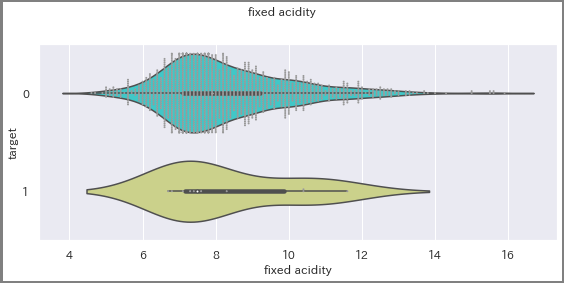

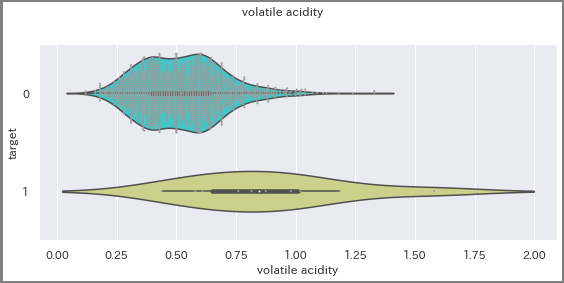

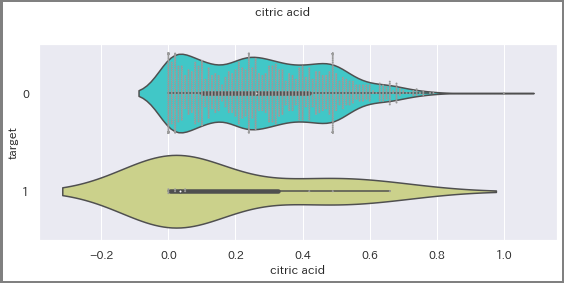

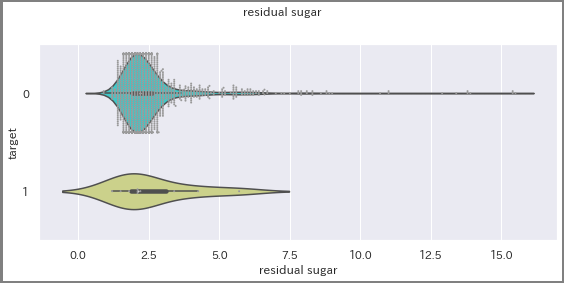

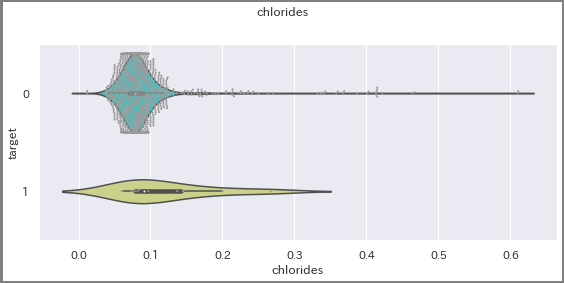

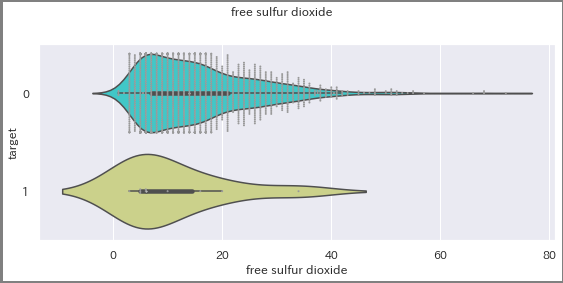

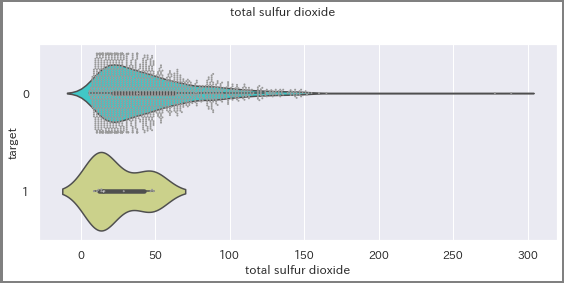

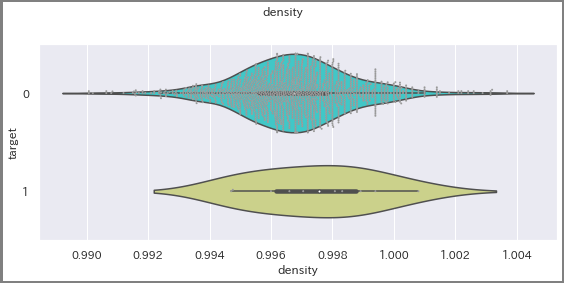

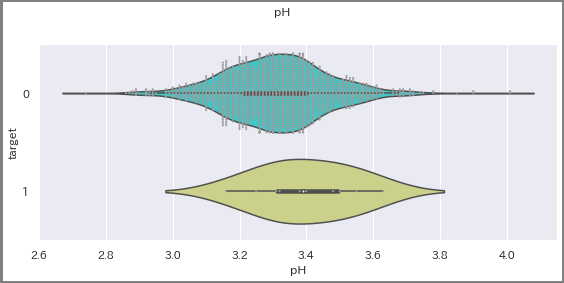

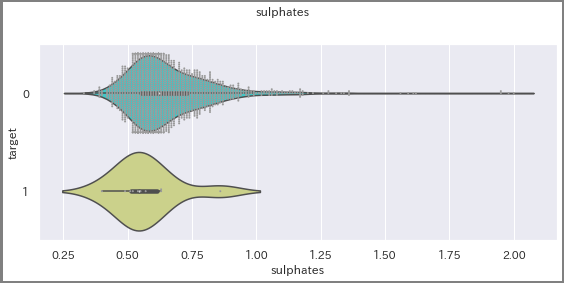

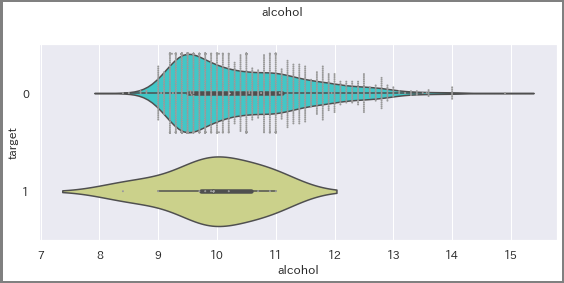

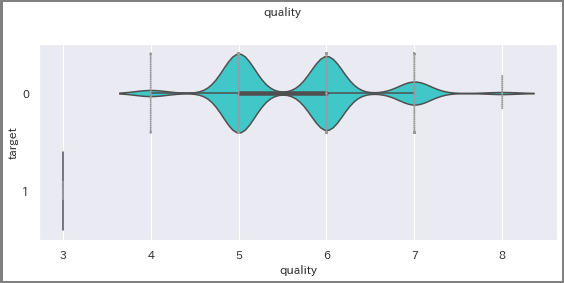

In [5]:
plotter = CategoricalTargetVsVarsViolinPlotter()
plotter.plot(df, 'target')